In [6]:
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

import numpy as np
import pandas as pd

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import sys
sys.path.append('../')
import utils

import os
dp = os.environ.get('pub_data')
dp = dp + 'XAI/'

In [3]:
# Load dataset and add squared term
credit_score = pd.read_csv(dp + "credit_score.csv")

# Select features
features = ['INCOME','DEBT','R_EXPENDITURE','R_ENTERTAINMENT','CAT_GAMBLING']
X = credit_score[features].copy()

# One-hot encoding
X['GAMBLING_LOW'] = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH']  = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)
X.drop(columns=['CAT_GAMBLING'], inplace=True)

# Target variable
y = credit_score['CREDIT_SCORE']

In [19]:
credit_score.head(10)

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
5,C04Q46QKOG,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,...,0.3571,0.0714,No,1,0,0,1,0,596,0
6,C069MLDS7X,60881,42617,383550,0.7000,6.3000,8.9999,2658,117,0.0440,...,1.4286,0.1587,No,1,0,0,1,0,580,0
7,C07VC05Z4R,220838,186863,2225362,0.8462,10.0769,11.9091,4383,1272,0.2902,...,0.9091,0.0763,No,1,1,0,1,0,596,0
8,C0CLKGEG1L,78615,62892,110061,0.8000,1.4000,1.7500,5912,2346,0.3968,...,1.2500,0.7143,High,1,0,0,1,0,638,0
9,C0DYD1C2G1,174000,1502729,411273,8.6364,2.3636,0.2737,2831,812,0.2868,...,0.1053,0.3846,High,1,0,1,1,1,636,0


In [4]:
# Train model
model = xgb.XGBRegressor(objective="reg:squarederror", max_depth=3, n_estimators=100) 
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluating the model

Text(0.5, 0, 'Actual')

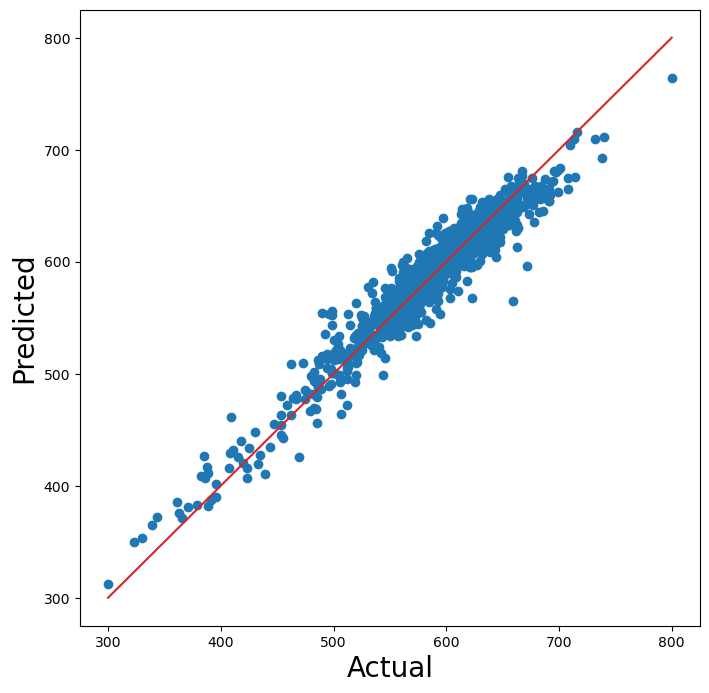

In [7]:
# Get predictions
y_pred = model.predict(X)

# Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='tab:red')

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

In [8]:
# Calculate performance metric
baseline_score = model.score(X, y)

baseline_score

0.9300410747528076

## Permute a feature

In [9]:
X_perm = X.copy()
X_perm['INCOME']= np.random.permutation(X_perm['INCOME'])

# Get predictions
y_pred = model.predict(X_perm)

Text(0.5, 0, 'Actual')

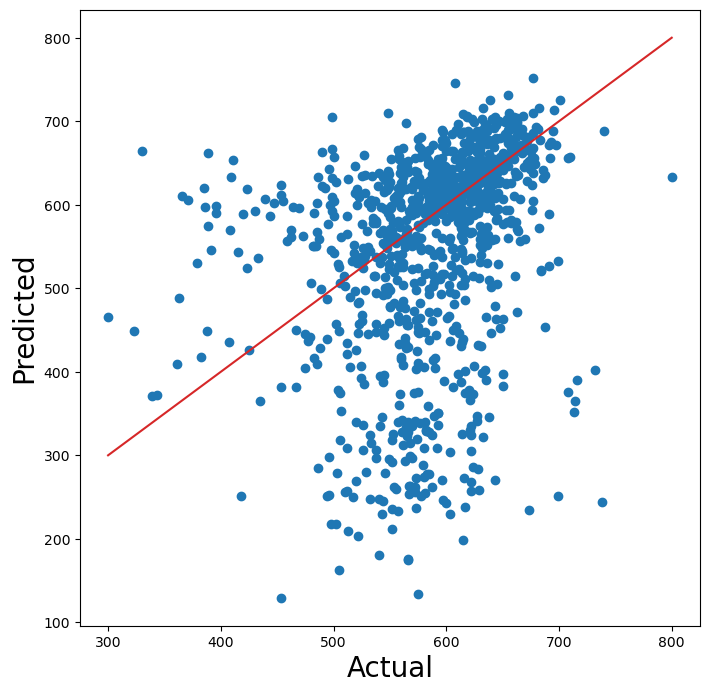

In [11]:
# Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='tab:red')

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

In [ ]:
# calculate performance metric on permuted data
permuted_score = model.score(X_perm, y)
significance_score = baseline_score - permuted_score
print(baseline_score, permuted_score)
significance_score

0.9300410747528076 -3.040011405944824


3.970052480697632

## Permuatation importance from scratch

In [13]:
def get_perm_importance(model, X, y, features, n=5):

    """
    Calculate permutation importance score for each feature
    """

    # Calculate baseline score (without permuting any feature)
    baseline_score = model.score(X, y)

    importance_scores = {}

    # Loop over each feature
    for feature in features:

        X_perm = X.copy()
        sum_score = 0

        # Repeat n times to get average importance score
        for i in range(n):
           
            # Calculate score when given feature is permuted
            X_perm[feature]= np.random.permutation(X_perm[feature])
            permuted_score = model.score(X_perm, y)

            sum_score += permuted_score

        # Calculate decrease in score
        importance_score = baseline_score - sum_score/n
        importance_scores[feature] = importance_score

    return importance_scores


Text(0.5, 0, 'Permutation Importance')

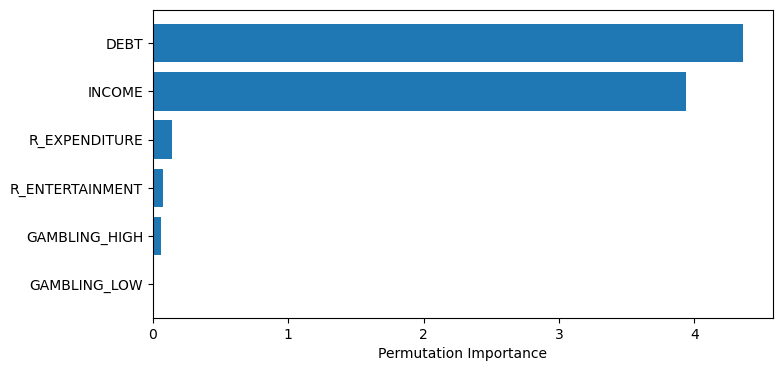

In [14]:
# Calculate permutation feature importance
importance_scores = get_perm_importance(model, X, y, X.columns,n=10)

# Display the importance scores using a horizontal bar plot
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1])
features, scores = zip(*sorted_importance_scores)

plt.subplots(figsize=(8,4))
plt.barh(features, scores)
plt.xlabel('Permutation Importance')

In [15]:
credit_score.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

## Using a package

Text(0.5, 0, 'Permutation Importance')

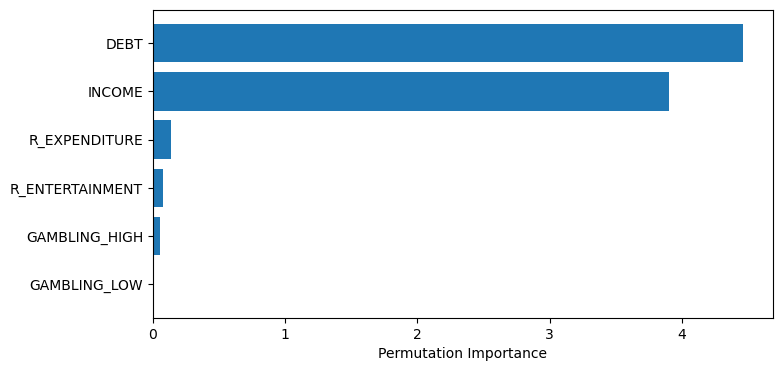

In [17]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
importance_scores = permutation_importance(model, X, y, n_repeats=10)

# Display the importance scores using a horizontal bar plot
sorted_idx = importance_scores.importances_mean.argsort()
features = X.columns[sorted_idx]
scores = importance_scores.importances_mean[sorted_idx]

plt.subplots(figsize=(8,4))
plt.barh(features, scores)
plt.xlabel('Permutation Importance')
